In [8]:
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt

In [9]:
cwd = os.getcwd()

# Construct the full file path
file_path = os.path.join(cwd, "USSTHPI.csv")
file_path_2 = os.path.join(cwd, "FLSTHPI.csv")
file_path_3 = os.path.join(cwd, "MEHOINUSA672N.csv")
file_path_4 = os.path.join(cwd, "MEHOINUSFLA646N.csv")
file_path_5 = os.path.join(cwd, "FLHOWN.csv")
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)
df_fl = pd.read_csv(file_path_2)

income_us = pd.read_csv(file_path_3)
income_fl = pd.read_csv(file_path_4)

ownership_fl = pd.read_csv(file_path_5)

print(df.head())
print(df_fl.head())
print("\n\n")
print(income_us.head())
print(income_fl.head())
print("\n\n")
print(ownership_fl.head())

         DATE  USSTHPI
0  1975-01-01    60.06
1  1975-04-01    61.00
2  1975-07-01    61.19
3  1975-10-01    62.24
4  1976-01-01    62.89
         DATE  FLSTHPI
0  1975-01-01    65.94
1  1975-04-01    83.43
2  1975-07-01    66.80
3  1975-10-01    68.21
4  1976-01-01    67.93



         DATE  MEHOINUSA672N
0  1984-01-01          55828
1  1985-01-01          56871
2  1986-01-01          58920
3  1987-01-01          59624
4  1988-01-01          60115
         DATE  MEHOINUSFLA646N
0  1984-01-01            19785
1  1985-01-01            21343
2  1986-01-01            22849
3  1987-01-01            24489
4  1988-01-01            25406



         DATE  FLHOWN
0  1984-01-01    66.5
1  1985-01-01    67.2
2  1986-01-01    66.5
3  1987-01-01    66.3
4  1988-01-01    64.9


## Begin formatting dataframes for analysis

In [10]:
# create a concatenated df for fl and us house listings
combined_df = pd.concat([df, df_fl['FLSTHPI']], axis=1)
combined_df

,DATE,USSTHPI,FLSTHPI
0,1975-01-01,60.06,65.94
1,1975-04-01,61.00,83.43
2,1975-07-01,61.19,66.80
3,1975-10-01,62.24,68.21
4,1976-01-01,62.89,67.93
...,...,...,...
187,2021-10-01,558.02,642.29
188,2022-01-01,578.63,678.17
189,2022-04-01,618.03,735.83
190,2022-07-01,628.55,767.66


In [11]:
print(income_us.head())
print(income_fl.head())

         DATE  MEHOINUSA672N
0  1984-01-01          55828
1  1985-01-01          56871
2  1986-01-01          58920
3  1987-01-01          59624
4  1988-01-01          60115
         DATE  MEHOINUSFLA646N
0  1984-01-01            19785
1  1985-01-01            21343
2  1986-01-01            22849
3  1987-01-01            24489
4  1988-01-01            25406


In [12]:
# Filter down us income to overall date range (2004 - 2012)
filtered_us = income_us.iloc[20:29, :]
filtered_us

,DATE,MEHOINUSA672N
20,2004-01-01,63745
21,2005-01-01,64427
22,2006-01-01,64930
23,2007-01-01,65801
24,2008-01-01,63455
25,2009-01-01,63011
26,2010-01-01,61364
27,2011-01-01,60428
28,2012-01-01,60313


In [13]:
# do the same for florida income
filtered_fl = income_fl.iloc[20:29, :]
filtered_fl

,DATE,MEHOINUSFLA646N
20,2004-01-01,40535
21,2005-01-01,42990
22,2006-01-01,45676
23,2007-01-01,45794
24,2008-01-01,44857
25,2009-01-01,45631
26,2010-01-01,44066
27,2011-01-01,45105
28,2012-01-01,46071


In [14]:
# create a concatenated df for household incomes too
combined_income = pd.concat([filtered_us, filtered_fl['MEHOINUSFLA646N']], axis=1)
combined_income

,DATE,MEHOINUSA672N,MEHOINUSFLA646N
20,2004-01-01,63745,40535
21,2005-01-01,64427,42990
22,2006-01-01,64930,45676
23,2007-01-01,65801,45794
24,2008-01-01,63455,44857
25,2009-01-01,63011,45631
26,2010-01-01,61364,44066
27,2011-01-01,60428,45105
28,2012-01-01,60313,46071


In [15]:
# filter the market dataframe to 2004-2012
combined = combined_df.iloc[116:152, :]
combined

,DATE,USSTHPI,FLSTHPI
116,2004-01-01,300.36,300.55
117,2004-04-01,307.69,314.68
118,2004-07-01,319.41,334.39
119,2004-10-01,326.26,349.68
120,2005-01-01,333.73,368.36
121,2005-04-01,344.42,395.92
122,2005-07-01,354.90,423.51
123,2005-10-01,362.93,445.77
124,2006-01-01,368.69,463.20
125,2006-04-01,372.46,473.09


In [16]:
# Filter down fl ownership to overall date range (2004 - 2012)
ownership_filtered = ownership_fl.iloc[20:29, :]
ownership_filtered

,DATE,FLHOWN
20,2004-01-01,72.2
21,2005-01-01,72.4
22,2006-01-01,72.4
23,2007-01-01,71.8
24,2008-01-01,71.1
25,2009-01-01,70.9
26,2010-01-01,69.3
27,2011-01-01,69.0
28,2012-01-01,67.0


In [17]:
# Rename columns
#df_subset = df_subset.rename(columns={'USSTHPI': 'Average Price'})
#df_subset_fl = df_subset.rename(columns={'FLSTHPI': 'Average Price'})
combined = combined.rename(columns={'USSTHPI': 'HPI (US)', 'FLSTHPI': 'HPI (FL)'})
combined_income = combined_income.rename(columns={'MEHOINUSA672N': 'Median Household Income (US)'
                                                 , 'MEHOINUSFLA646N' : 'Median Household Income (FL)'})
ownership_filtered = ownership_filtered.rename(columns={'FLHOWN': 'Ownership Rate'})

#print(df_subset.head())
#print("\n")
#print(df_subset_fl.head())
#print("\n")
print(combined.head())
print("\n")
print(combined_income.head())
print("\n")
print(ownership_filtered.head())

           DATE  HPI (US)  HPI (FL)
116  2004-01-01    300.36    300.55
117  2004-04-01    307.69    314.68
118  2004-07-01    319.41    334.39
119  2004-10-01    326.26    349.68
120  2005-01-01    333.73    368.36


          DATE  Median Household Income (US)  Median Household Income (FL)
20  2004-01-01                         63745                         40535
21  2005-01-01                         64427                         42990
22  2006-01-01                         64930                         45676
23  2007-01-01                         65801                         45794
24  2008-01-01                         63455                         44857


          DATE  Ownership Rate
20  2004-01-01            72.2
21  2005-01-01            72.4
22  2006-01-01            72.4
23  2007-01-01            71.8
24  2008-01-01            71.1


## Analysis for overall house listings

In [137]:
# Create a line plot
#combined.plot(x='DATE', y='HPI (US)')

# Set the axis and title
#plt.title('National House Price Index \n(2004-2012)\n')
#plt.ylabel('HPI (Hundred Thousands)\n')
#plt.xlabel('\nDate')
#plt.xticks(rotation=75, fontsize=8)
#plt.yticks(fontsize=8)
# save plot
#plt.savefig('2004-2012_line_HPI.png', bbox_inches='tight')
# Show the plot
#plt.show()

In [138]:
# Create a line plot
#combined.plot(x='DATE', y='HPI (FL)', color = 'orange')

# labels

#plt.title('Florida House Price Index \n(2004-2012)\n')
#plt.ylabel('HPI (Hundred Thousands)\n')
#plt.xlabel('\nDate')
#plt.xticks(rotation=75, fontsize=8)
#plt.yticks(fontsize=8)
# save plot
#plt.savefig('2004-2012_HPI_fl.png', bbox_inches='tight')
# Show the plot
#plt.show()

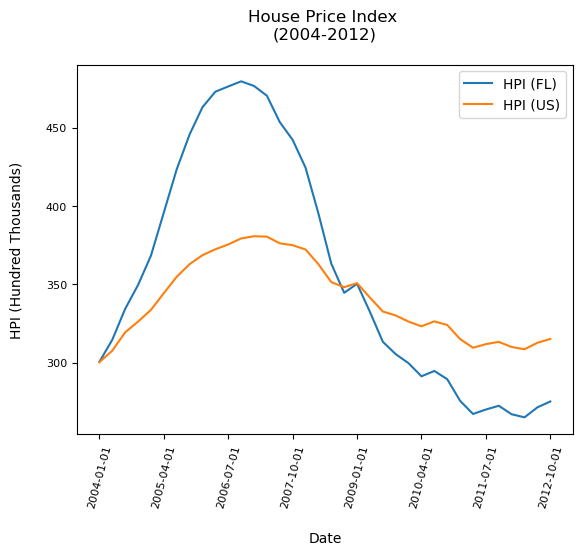

In [139]:
# Line graph national + florida
combined.plot(x='DATE', y=['HPI (FL)', 'HPI (US)'])

# labels
plt.title('House Price Index \n(2004-2012)\n')
plt.ylabel('HPI (Hundred Thousands)\n')
plt.xlabel('\nDate')
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=8)
# save plot
plt.savefig('2004-2012_HPI_combined.png', bbox_inches='tight')
# Show the plot
plt.show()

## Analysis for recession years

In [140]:
# Select rows 130 to 141 (recession)
combined_subset = combined_df.iloc[130:141, :]
combined_subset

,DATE,USSTHPI,FLSTHPI
130,2007-07-01,376.28,453.68
131,2007-10-01,375.07,442.35
132,2008-01-01,372.32,424.62
133,2008-04-01,362.93,395.31
134,2008-07-01,351.49,363.23
135,2008-10-01,348.25,344.68
136,2009-01-01,350.83,350.41
137,2009-04-01,341.63,332.46
138,2009-07-01,332.72,313.39
139,2009-10-01,330.19,305.48


In [142]:
# rename columns again
combined_subset = combined_subset.rename(columns={'USSTHPI': 'HPI (US)', 'FLSTHPI': 'HPI (FL)'})
combined_subset

,DATE,HPI (US),HPI (FL)
130,2007-07-01,376.28,453.68
131,2007-10-01,375.07,442.35
132,2008-01-01,372.32,424.62
133,2008-04-01,362.93,395.31
134,2008-07-01,351.49,363.23
135,2008-10-01,348.25,344.68
136,2009-01-01,350.83,350.41
137,2009-04-01,341.63,332.46
138,2009-07-01,332.72,313.39
139,2009-10-01,330.19,305.48


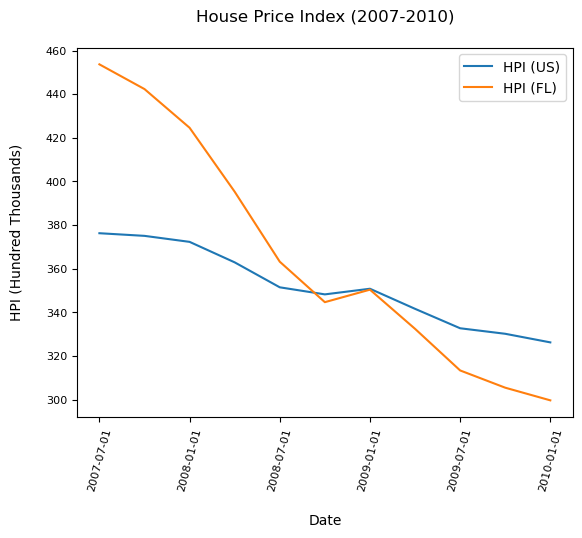

In [143]:
# Line graph national + florida
combined_subset.plot(x='DATE', y=['HPI (US)', 'HPI (FL)'])

# labels
plt.title('House Price Index (2007-2010)\n')
plt.ylabel('HPI (Hundred Thousands)\n')
plt.xlabel('\nDate')
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=8)
# save plot
plt.savefig('2007-2010_HPI_combined.png', bbox_inches='tight')
# Show the plot
plt.show()

In [94]:
# Line graph florida
#combined_subset.plot(x='DATE', y='HPI (FL)', color = 'orange')

# labels
#plt.title('House Price Index FL (2007-2010)\n')
#plt.ylabel('HPI (Hundred Thousands)\n')
#plt.xlabel('\nDate')
#plt.xticks(rotation=75, fontsize=8)
#plt.yticks(fontsize=8)
# save plot
#plt.savefig('2007-2010_HPI_fl.png', bbox_inches='tight')
# Show the plot
#plt.show()

In [95]:
# Line graph national
#combined_subset.plot(x='DATE', y='HPI (US)')

# labels
#plt.title('House Price Index US (2007-2010)\n')
#plt.ylabel('HPI (Hundred Thousands)\n')
#plt.xlabel('\nDate')
#plt.xticks(rotation=75, fontsize=8)
#plt.yticks(fontsize=8)
# save plot
#plt.savefig('2007-2010_HPI_US.png', bbox_inches='tight')
# Show the plot
#plt.show()

## Analysis for household income

In [96]:
combined_income

,DATE,Median Household Income (US),Median Household Income (FL)
20,2004-01-01,63745,40535
21,2005-01-01,64427,42990
22,2006-01-01,64930,45676
23,2007-01-01,65801,45794
24,2008-01-01,63455,44857
25,2009-01-01,63011,45631
26,2010-01-01,61364,44066
27,2011-01-01,60428,45105
28,2012-01-01,60313,46071


In [97]:
# Chart for incomes 2004-2012 us
#combined_income.plot(x='DATE', y='Median Household Income (US)')

# labels
#plt.title('Median Household Income US (2007-2010)\n')
#plt.ylabel('Income (Ten Thousands)\n')
#plt.xlabel('\nDate')
#plt.xticks(rotation=75, fontsize=8)
#plt.yticks(fontsize=8)
# save plot
#plt.savefig('2004-2012_income_US.png', bbox_inches='tight')
# Show the plot
#plt.show()

In [98]:
# Chart for incomes 2004-2012 fl
#combined_income.plot(x='DATE', y='Median Household Income (FL)', color = "orange")

# labels
#plt.title('Median Household Income US (2007-2010)\n')
#plt.ylabel('Income (Ten Thousands)\n')
#plt.xlabel('\nDate')
#plt.xticks(rotation=75, fontsize=8)
#plt.yticks(fontsize=8)
# save plot
#plt.savefig('2004-2012_income_FL.png', bbox_inches='tight')
# Show the plot
#plt.show()

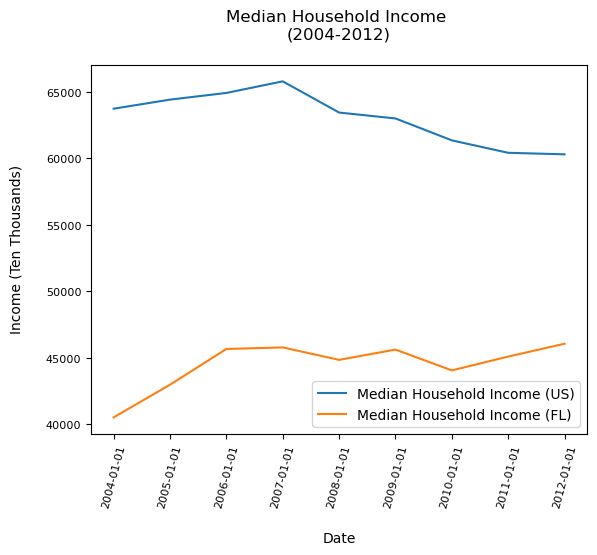

In [100]:
# Chart for incomes 2004-2012 (combined)
combined_income.plot(x='DATE', y=['Median Household Income (US)', 'Median Household Income (FL)'])

# labels
plt.title('Median Household Income \n(2004-2012)\n')
plt.ylabel('Income (Ten Thousands)\n')
plt.xlabel('\nDate')
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=8)
# save plot
plt.savefig('2004-2012_income_combined.png', bbox_inches='tight')
# Show the plot
plt.show()

## Homeownership analysis

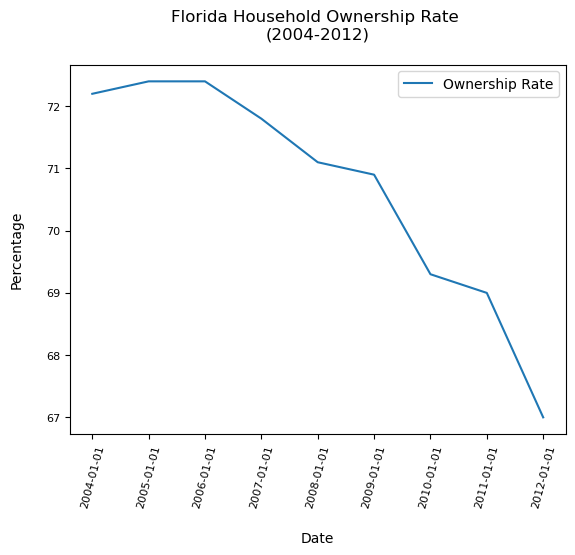

In [19]:
# Chart for incomes 2004-2012 (combined)
ownership_filtered.plot(x='DATE', y=['Ownership Rate'])

# labels
plt.title('Florida Household Ownership Rate \n(2004-2012)\n')
plt.ylabel('Percentage\n')
plt.xlabel('\nDate')
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=8)
# save plot
plt.savefig('2004-2012_ownership_fl.png', bbox_inches='tight')
# Show the plot
plt.show()

In [23]:
# Provide more context, go further until latest date
# get ending index through tail
ownership_fl.tail()

,DATE,FLHOWN
34,2018-01-01,65.5
35,2019-01-01,66.0
36,2020-01-01,68.7
37,2021-01-01,67.2
38,2022-01-01,67.3


In [25]:
more_ownership = ownership_fl.iloc[20:39, :]
more_ownership

,DATE,FLHOWN
20,2004-01-01,72.2
21,2005-01-01,72.4
22,2006-01-01,72.4
23,2007-01-01,71.8
24,2008-01-01,71.1
25,2009-01-01,70.9
26,2010-01-01,69.3
27,2011-01-01,69.0
28,2012-01-01,67.0
29,2013-01-01,66.1


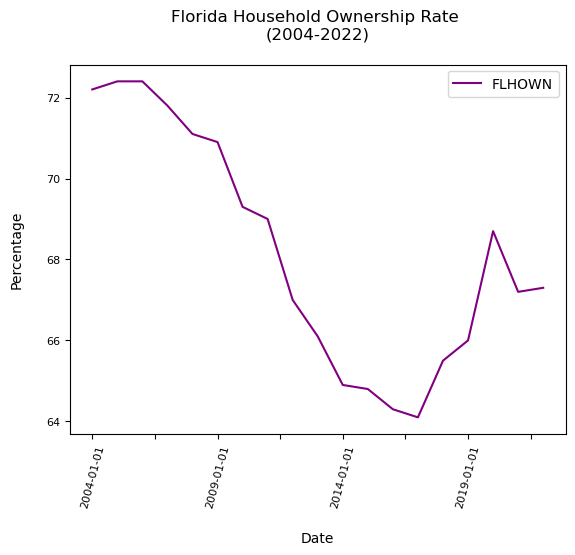

In [30]:
# plot again with this new data
more_ownership.plot(x='DATE', y=['FLHOWN'], color = "purple")

# labels
plt.title('Florida Household Ownership Rate \n(2004-2022)\n')
plt.ylabel('Percentage\n')
plt.xlabel('\nDate')
plt.xticks(rotation=75, fontsize=8)
plt.yticks(fontsize=8)
# save plot
plt.savefig('2004-2022_ownership_fl.png', bbox_inches='tight')
# Show the plot
plt.show()